# Plot of R-squared value in relation to sum of sale, and quartiles

This plot illustrates Relationship between R-squared values, their corresponding quartiles, and the sum of sales across municipalities.

Script by Lars Kjær

In [81]:
from pathlib import Path
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)

In [82]:
print(pd.__version__)

2.0.3


In [83]:
# Load parameter data
input_path = Path.cwd()/'ml_data/fitted_models' # path of files to be found
parameter_data = pd.read_csv(input_path/'all_metrics_lasso_year.csv')
#parameter_data = pd.read_csv(input_path/'metrics_lasso.csv')


# Load municipality data
muni_codes = pd.read_csv('municipality_number_codes.csv', sep=';', names=['muni_name', 'muni_code'] )

# Merge the parameter and the geo data 

merged_df = muni_codes.merge(parameter_data, on='muni_code')
merged_df = merged_df.loc[:, ['muni_code', 'muni_name', 'rmse', 'r2']]


# get data on numbers of sales 
inlier_data_path = Path.cwd()/'Boliga data/inlier_data'
files = os.listdir(inlier_data_path)
dfs =  []
for i in files:
    df = pd.read_csv(inlier_data_path/i, low_memory=False)
    dfs.append(df)
    
    
# concat dataframes, wrangle, send back to new dataframe, and merge into 'merged_df' 
new_df = pd.concat(dfs)
#new_df = new_df['municipality'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'muni_code', 'municipality': 'sum_sale'})
new_df = new_df['municipality'].value_counts().reset_index()
new_df.columns = ['muni_code', 'sum_sale']

merged_df = merged_df.merge(new_df, on='muni_code', how='left')
#new_df

In [84]:
# Calculate summary statistics using describe()
summary_stats = merged_df['r2'].describe()

# Extract quartile values from the summary statistics
q1 = summary_stats['25%']
q2 = summary_stats['50%']
q3 = summary_stats['75%']

# Create a function to assign quartile labels
def assign_quartile(value):
    if value <= q1:
        return 'q1'
    elif value <= q2:
        return 'q2'
    elif value <= q3:
        return 'q3'
    else:
        return 'q4'

# Add quartile labels column to the DataFrame
merged_df['quartiles'] = merged_df['r2'].apply(assign_quartile)

# sort value 'r2'
sort_merged_data = merged_df.sort_values('r2').reset_index(drop=True)

# subset q4 
sort_merged_data_q4 = sort_merged_data[sort_merged_data['quartiles'] == 'q4']

#sort_merged_data_q4.sort_values('r2', ascending=False).head(10) 

In [85]:
merged_df.sort_values('r2')

,muni_code,muni_name,rmse,r2,sum_sale,quartiles
72,615,Horsens,9894.583268,-36.080242,40915,q1
39,329,Ringsted,14503.163230,-33.587461,15423,q1
50,607,Fredericia,4042.976509,-26.133980,20868,q1
16,217,Helsingør,10197.030902,-23.644525,30339,q1
17,163,Herlev,12820.034963,-19.333918,6832,q1
33,326,Kalundborg,4411.945676,-14.811973,24120,q1
43,340,Sorø,6844.806380,-11.448113,14473,q1
26,175,Rødovre,11567.523998,-11.085657,15476,q1
22,183,Ishøj,6440.028195,-10.541719,8716,q1
89,860,Hjørring,4089.839638,-9.092663,31418,q1


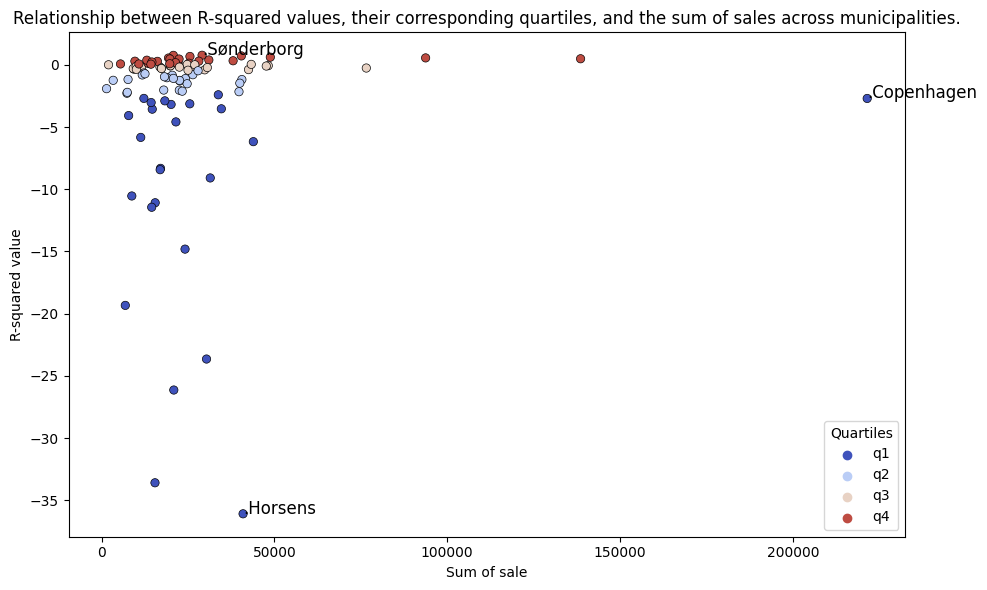

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for each quartile
quartile_colors = {'q1': '#3f52bc', 'q2': '#bacdf6', 'q3': '#e8d2c4', 'q4': '#be4c42'}

# Create a scatter plot
plt.figure(figsize=(10, 6))

scatterplot = sns.scatterplot(data=merged_df, x='sum_sale', y='r2', hue='quartiles', palette=quartile_colors, edgecolor="black")

# Customize title and labels
plt.title("Relationship between R-squared values, their corresponding quartiles, and the sum of sales across municipalities.")
plt.xlabel('Sum of sale')
plt.ylabel('R-squared value')

# Add text annotations
annotations = {'København': 'Copenhagen', 'Sønderborg': 'Sønderborg', 'Horsens': 'Horsens'}
for name, label in annotations.items():
    x_val = merged_df[merged_df['muni_name'] == name]['sum_sale']
    y_val = merged_df[merged_df['muni_name'] == name]['r2']
    plt.text(x_val, y_val, f'.{label}', fontsize=12, color='black')

# Get handles and labels of the legend
handles, labels = scatterplot.get_legend_handles_labels()

# Reorder handles and labels according to quartile order
sorted_quartiles = ['q1', 'q2', 'q3', 'q4']
handles = [handle for label, handle in sorted(zip(labels, handles), key=lambda pair: sorted_quartiles.index(pair[0]))]
labels = sorted_quartiles

# Set custom colors for legend handles
for i, handle in enumerate(handles):
    handle.set_color(quartile_colors[labels[i]])

# Set the reordered labels for the legend
scatterplot.legend(handles, labels, title='Quartiles', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()
